# RiverCast

## Import Libraries and Dataset

In [1]:
# import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
# import dataset
df = pd.read_csv('dataset.csv')
df.dropna(inplace=True)
df.head(10)

,Station,Year,Month,Day,Hour,Waterlevel,Station.1,Year.1,Month.1,Day.1,...,RF-Intensity.1,Humidity,Precipitation,Temperature,Temperature.1,Humidity.1,Precipitation.1,Temperature.2,Humidity.2,Precipitation.2
0,NANGKA,2012,January,1,1,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
1,NANGKA,2012,January,1,2,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
2,NANGKA,2012,January,1,3,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
3,NANGKA,2012,January,1,4,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
4,NANGKA,2012,January,1,5,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
5,NANGKA,2012,January,1,6,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
6,NANGKA,2012,January,1,7,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
7,NANGKA,2012,January,1,8,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
8,NANGKA,2012,January,1,9,15.86,STO.NINO,2012,January,1,...,0.0,17.64,0.01,26.20,26.20,17.64,0.01,26.20,17.64,0.01
9,NANGKA,2012,January,1,10,15.86,STO.NINO,2012,January,1,...,0.0,17.27,0.02,27.55,27.55,17.27,0.02,27.55,17.27,0.02


In [3]:
# remove non numeric fields
df = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2', 'Waterlevel.3', 'RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
df = df.astype(np.float64)  # make sure that all data are float type
df.head(10)

,Waterlevel,Waterlevel.1,Waterlevel.2,Waterlevel.3,RF-Intensity,RF-Intensity.1,Temperature,Temperature.1,Temperature.2,Humidity,Humidity.1,Humidity.2,Precipitation,Precipitation.1,Precipitation.2
0,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
1,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
2,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
3,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
4,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
5,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
6,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
7,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
8,15.86,12.53,12.53,21.97,0.0,0.0,26.20,26.20,26.20,17.64,17.64,17.64,0.01,0.01,0.01
9,15.86,12.53,12.53,21.97,0.0,0.0,27.55,27.55,27.55,17.27,17.27,17.27,0.02,0.02,0.02


## Clean Dataset

### Remove Dataset Outliers

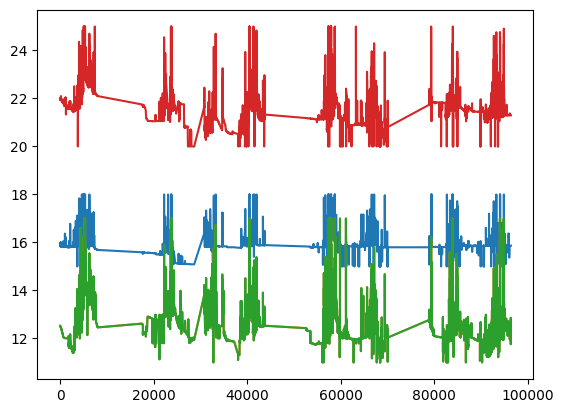

In [4]:
# remove water data outliers
df['Waterlevel'] = df['Waterlevel'].clip(upper=18, lower=15, axis=0)
df['Waterlevel.1'] = df['Waterlevel.1'].clip(upper=17, lower=11, axis=0)
df['Waterlevel.2'] = df['Waterlevel.2'].clip(upper=17, lower=11, axis=0)
df['Waterlevel.3'] = df['Waterlevel.3'].clip(upper=25, lower=20, axis=0)

water_data = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2', 'Waterlevel.3']]
plt.plot(water_data)

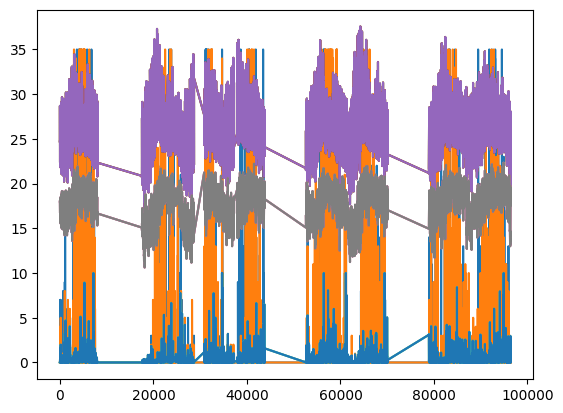

In [5]:
# remove weather data outliers
df['RF-Intensity'] = df['RF-Intensity'].clip(upper=35, lower=0, axis=0)
df['RF-Intensity.1'] = df['RF-Intensity.1'].clip(upper=35, lower=0, axis=0)
df[['Precipitation', 'Precipitation.1', 'Precipitation.2']] = df[['Precipitation', 'Precipitation.1', 'Precipitation.2']].clip(upper=10, lower=0, axis=0)

weather_data = df[['RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
plt.plot(weather_data)

In [6]:
# make time series stationary
df = df.diff()
df = df.drop(index=0)
df.shape

(59656, 15)

In [7]:
# smoothen time-series using moving average
df = df.rolling(window=72).mean()
df.dropna(inplace=True)
df.shape

(59585, 15)

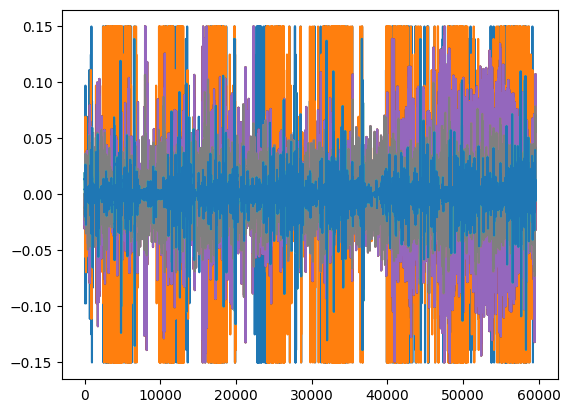

In [8]:
# plot weather data
weather_data = df[['RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
weather_data = weather_data.clip(upper=0.15, lower=-0.15, axis=0)
weather_data = weather_data.to_numpy()
plt.plot(weather_data)

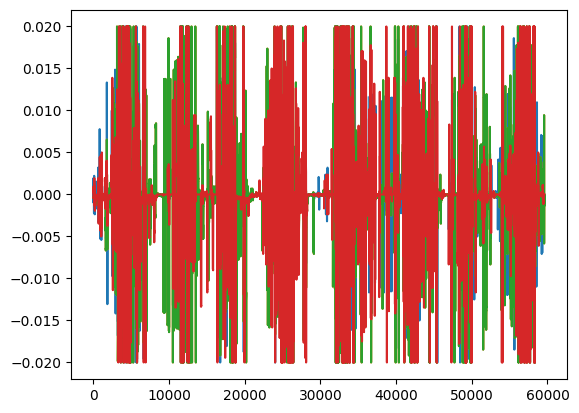

In [9]:
# plot water data
water_data = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2', 'Waterlevel.3']]
water_data = water_data.clip(upper=0.02, lower=-0.02, axis=0)
water_data = water_data.to_numpy()
plt.plot(water_data)

## Principal Component Analysis

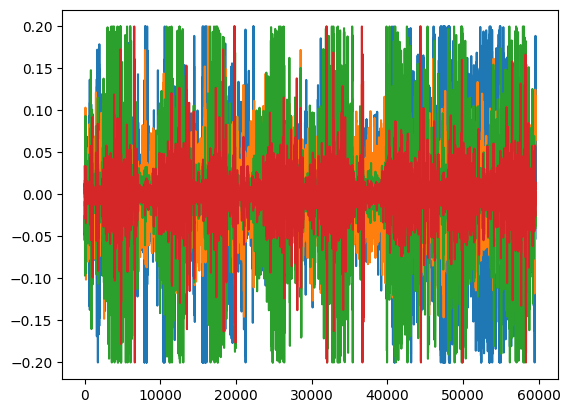

In [10]:
# compute covariance matrix
weather_cov_matrix = np.cov(weather_data, ddof=0, rowvar=False)

# compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(weather_cov_matrix)
order_of_importance = np.argsort(eigenvalues)[::-1] 

# sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[order_of_importance].real
sorted_eigenvectors = eigenvectors[:,order_of_importance].real

k = 4  # number of features to preserve
weather_data = np.matmul(weather_data, sorted_eigenvectors[:,:k]) # transform the original data
weather_data = np.clip(weather_data, -0.2, 0.2)
plt.plot(weather_data)

## Normalize Dataset

In [11]:
# combine data
dataset = np.hstack((weather_data, water_data))
dataset.shape

(59585, 8)

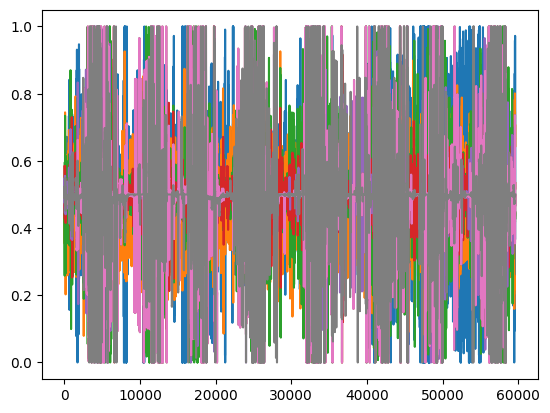

In [12]:
# normalize data
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
plt.plot(dataset)

## Prepare Batches

In [13]:
# utilize rolling window to generate dataset
MAX_TOKENS = 48
window_size = MAX_TOKENS + 1
window_step = 12
series_len = len(dataset) - window_size

windows = np.array([dataset[i:(i + window_size)] for i in range(0, series_len, window_step)])
print(windows.shape)

(4962, 49, 8)


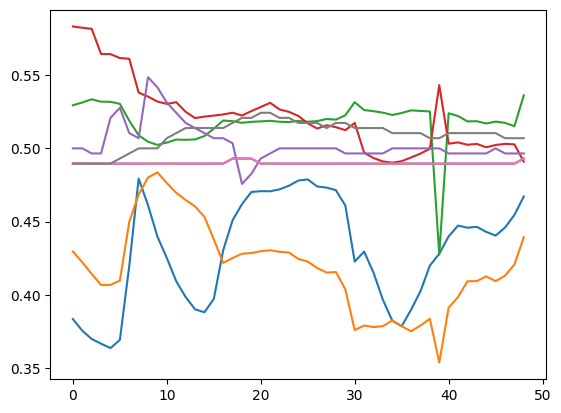

In [14]:
plt.plot(windows[0])

In [15]:
# split dataset
train_data = windows[:3472]
val_data = windows[3472:4216]
test_data = windows[4216:]

print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

(3472, 49, 8)
(744, 49, 8)
(746, 49, 8)


In [16]:
# convert them into tf constants
train_tensors = tf.constant(train_data, dtype=tf.float32)
val_tensors = tf.constant(val_data, dtype=tf.float32)
test_tensors = tf.constant(test_data, dtype=tf.float32)

print(train_tensors.shape)
print(val_tensors.shape)
print(val_tensors.shape)

(3472, 49, 8)
(744, 49, 8)
(744, 49, 8)


In [17]:
BATCH_SIZE = 128
def prepare_batch(data):
    weather = data[:, :MAX_TOKENS, :4]    # Trim to MAX_TOKENS.
    water_inputs = data[:, :-1, 4:]  # Drop the [END] tokens
    water_labels = data[:, 1:, 4:]   # Drop the [START] tokens

    return (weather, water_inputs), water_labels

def make_batches(ds, batch_size=BATCH_SIZE):
      return (ds.batch(batch_size)
                .map(prepare_batch, tf.data.AUTOTUNE)
                .prefetch(buffer_size=tf.data.AUTOTUNE))
      
train_batches = make_batches(tf.data.Dataset.from_tensor_slices(train_tensors))
val_batches = make_batches(tf.data.Dataset.from_tensor_slices(val_tensors))
test_batches = make_batches(tf.data.Dataset.from_tensor_slices(test_tensors))

In [18]:
for (weather, water_inputs), water_labels in test_batches.take(1):
    break

print(weather.shape)
print(water_inputs.shape)
print(water_labels.shape)

(128, 48, 4)
(128, 48, 4)
(128, 48, 4)


## Build the Model

### Positional Encoding

In [19]:
def positional_encoding(length, depth):
    depth = depth / 2

    positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
    depths = np.arange(depth)[np.newaxis, :] / depth   # (1, depth)

    angle_rates = 1 / (10000**depths)         # (1, depth)
    angle_rads = positions * angle_rates      # (pos, depth)

    pos_encoding = np.concatenate([np.sin(angle_rads), np.cos(angle_rads)], axis=-1) 

    return tf.cast(pos_encoding, dtype=tf.float32)


class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, d_model):
        super().__init__()
        self.d_model = d_model
        self.pos_encoding = positional_encoding(length=1024, depth=d_model)

    def call(self, x):
        length = tf.shape(x)[1]
        # This factor sets the relative scale of the embedding and positional_encoding.
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x = x + self.pos_encoding[tf.newaxis, :length, :]
        return x

### Self-Attention Layers

In [20]:
class BaseAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
        self.layernorm = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()
        
class CrossAttention(BaseAttention):
    def call(self, x, context):
        attn_output, attn_scores = self.mha(
            query=x,
            key=context,
            value=context,
            return_attention_scores=True)

        # Cache the attention scores for plotting later.
        self.last_attn_scores = attn_scores

        x = self.add([x, attn_output])
        x = self.layernorm(x)

        return x

# layer test
cross_attn = CrossAttention(num_heads=2, key_dim=4, dropout=0.1)
attn_scores = cross_attn(water_inputs, weather)
print(attn_scores.shape)
    
class GlobalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(
            query=x,
            value=x,
            key=x)
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        return x
    
# layer test
global_attn = GlobalSelfAttention(num_heads=2, key_dim=4, dropout=0.1)
attn_scores = global_attn(weather)
print(attn_scores.shape)
    
class CausalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(
            query=x,
            value=x,
            key=x,
            use_causal_mask=True)
        
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        return x
    
# layer test
casual_attn = CausalSelfAttention(num_heads=2, key_dim=4, dropout=0.1)
attn_scores = casual_attn(water_inputs)
print(attn_scores.shape)

(128, 48, 4)
(128, 48, 4)
(128, 48, 4)


### Feed Forward Layer

In [21]:
class FeedForward(tf.keras.layers.Layer):
    def __init__(self, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.seq = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation='tanh'),
            tf.keras.layers.Dense(d_model),
            tf.keras.layers.Dropout(dropout_rate)
        ])
        self.add = tf.keras.layers.Add()
        self.layer_norm = tf.keras.layers.LayerNormalization()

    def call(self, x):
        x = self.add([x, self.seq(x)])
        x = self.layer_norm(x) 
        return x
    
# layer test
feed_forward = FeedForward(d_model=4, dff=512)
output = feed_forward(water_inputs)
output.shape

TensorShape([128, 48, 4])

### Encoder

In [22]:
# Encoder Layer

class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self,*, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.self_attention = GlobalSelfAttention(
            num_heads=2,
            key_dim=d_model,
            dropout=dropout_rate)
        
        self.ffn = FeedForward(d_model, dff)

    def call(self, x):
        x = self.self_attention(x)
        x = self.ffn(x)
        return x
    
class Encoder(tf.keras.layers.Layer):
    def __init__(self, *, num_layers, dff, d_model=4, dropout_rate=0.1):
        super().__init__()
        self.d_model = d_model
        self.num_layers = num_layers

        self.pos_embedding = PositionalEmbedding(d_model=d_model)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.enc_layers = [EncoderLayer(d_model=d_model, dff=dff, dropout_rate=dropout_rate) for _ in range(num_layers)]

    def call(self, x):
        x = self.pos_embedding(x)  # Shape `(batch_size, seq_len, d_model)`.
        x = self.dropout(x)
       
        for i in range(self.num_layers):
            x = self.enc_layers[i](x)

        return x  # Shape `(batch_size, seq_len, d_model)`.
    
# layer test
encoder = Encoder(num_layers=1, dff=512)
output = encoder(weather)
output.shape

TensorShape([128, 48, 4])

### Decoder

In [23]:

class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, *, d_model, dff, dropout_rate=0.1):
        super(DecoderLayer, self).__init__()
        self.causal_self_attention = CausalSelfAttention(
            num_heads=2,
            key_dim=d_model,
            dropout=dropout_rate)
        
        self.cross_attention = CrossAttention(
            num_heads=2,
            key_dim=d_model,
            dropout=dropout_rate)
        
        self.ffn = FeedForward(d_model, dff)

    def call(self, x, context):
        x = self.causal_self_attention(x=x)
        x = self.cross_attention(x=x, context=context)
        self.last_attn_scores = self.cross_attention.last_attn_scores  # Cache the last attention scores
        x = self.ffn(x)  
        return x
    
class Decoder(tf.keras.layers.Layer):
    def __init__(self, *, num_layers, dff, d_model=4, dropout_rate=0.1):
        super(Decoder, self).__init__()
        self.d_model = d_model
        self.num_layers = num_layers
        
        self.pos_embedding = PositionalEmbedding(d_model=d_model)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.dec_layers = [DecoderLayer(d_model=d_model, dff=dff, dropout_rate=dropout_rate) for _ in range(num_layers)]
        self.last_attn_scores = None

    def call(self, x, context):
        x = self.pos_embedding(x)
        x = self.dropout(x)
        
        for i in range(self.num_layers):
            x  = self.dec_layers[i](x, context)

        self.last_attn_scores = self.dec_layers[-1].last_attn_scores

        # The shape of x is (batch_size, target_seq_len, d_model).
        return x

# layer test
decoder = Decoder(num_layers=1, dff=512)
output = decoder(water_inputs, weather)
output.shape

TensorShape([128, 48, 4])

### Transformer Model

In [24]:
class Transformer(tf.keras.Model):
    def __init__(self, *, num_layers, dff, target_output_size, dropout_rate=0.1):
        super().__init__()
        self.encoder = Encoder(num_layers=num_layers, dff=dff, dropout_rate=dropout_rate)
        self.decoder = Decoder(num_layers=num_layers, dff=dff, dropout_rate=dropout_rate)
        self.final_layer = tf.keras.layers.Dense(target_output_size, activation='sigmoid')

    def call(self, inputs):
        # To use a Keras model with `.fit` you must pass all your inputs in the
        # first argument.
        context, x  = inputs

        context = self.encoder(context)  # (batch_size, context_len, d_model)

        x = self.decoder(x, context)  # (batch_size, target_len, d_model)

        # Final linear layer output.
        pred = self.final_layer(x)  # (batch_size, target_len, target_vocab_size)

        try:
            # Drop the keras mask, so it doesn't scale the losses/metrics.
            # b/250038731
            del pred._keras_mask
        except AttributeError:
            pass

        # Return the final output and the attention weights.
        return pred

## Compile and Train Model

In [25]:
transformer = Transformer(num_layers=2, dff=1024, target_output_size=4)

output = transformer((weather, water_inputs))
output.shape

TensorShape([128, 48, 4])

In [26]:
transformer.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.MeanAbsoluteError()])

transformer.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (Encoder)         multiple                  18784     
                                                                 
 decoder_1 (Decoder)         multiple                  19112     
                                                                 
 dense_14 (Dense)            multiple                  20        
                                                                 
Total params: 37916 (148.11 KB)
Trainable params: 37916 (148.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
checkpoint_path = "train_tf_v3_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=3)

transformer.fit(train_batches, epochs=100, validation_data=val_batches, callbacks=[es_callback, cp_callback])

Epoch 1/100
28/28 [==============================] - ETA: 0s - loss: 0.0338 - mean_absolute_error: 0.1329
Epoch 1: saving model to train_tf_v3_2\cp.ckpt
28/28 [==============================] - 25s 450ms/step - loss: 0.0338 - mean_absolute_error: 0.1329 - val_loss: 0.0226 - val_mean_absolute_error: 0.1023
Epoch 2/100
28/28 [==============================] - ETA: 0s - loss: 0.0226 - mean_absolute_error: 0.0993
Epoch 2: saving model to train_tf_v3_2\cp.ckpt
28/28 [==============================] - 11s 377ms/step - loss: 0.0226 - mean_absolute_error: 0.0993 - val_loss: 0.0190 - val_mean_absolute_error: 0.0830
Epoch 3/100
27/28 [===========================>..] - ETA: 0s - loss: 0.0195 - mean_absolute_error: 0.0821
Epoch 3: saving model to train_tf_v3_2\cp.ckpt
28/28 [==============================] - 10s 369ms/step - loss: 0.0195 - mean_absolute_error: 0.0821 - val_loss: 0.0176 - val_mean_absolute_error: 0.0709
Epoch 4/100
28/28 [==============================] - ETA: 0s - loss: 0.0183 - m

## Test the Model

In [28]:
def make_predictions(index, max_length=MAX_TOKENS):
    input_array = weather[index:(index+1)]
    label_array = water_labels[index:(index+1)][0]
    
    initial = water_inputs[index:(index+1)][0][0]
    output_array = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
    output_array = output_array.write(0, initial)
  
    for i in tf.range(max_length):
        output = tf.reshape(output_array.stack(), shape=(1, -1, 4))
        prediction = transformer((input_array, output), training=False)

        output_array = output_array.write(i+1, prediction[0][0])

    plt.plot(output_array.stack())
    plt.plot(label_array)

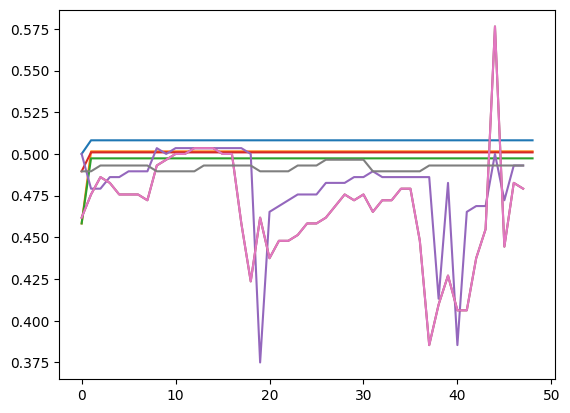

In [29]:
make_predictions(10)

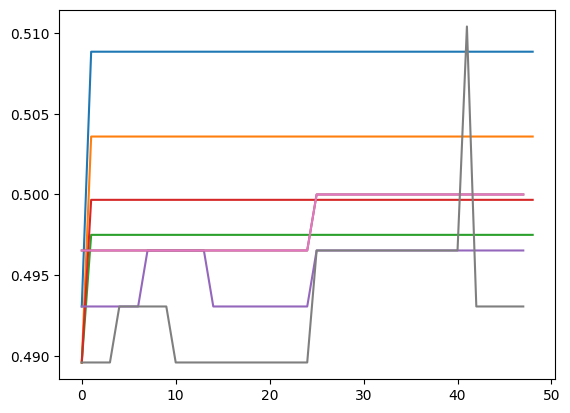

In [30]:
make_predictions(35)

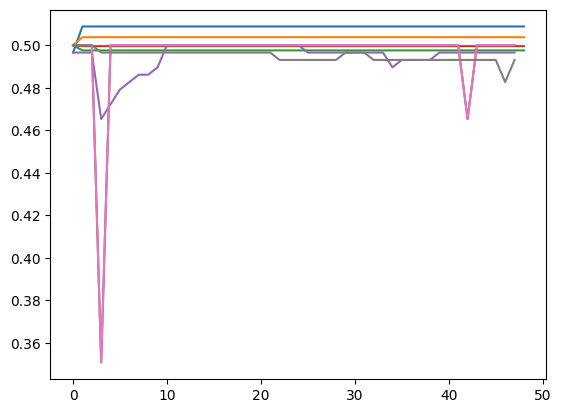

In [31]:
make_predictions(50)

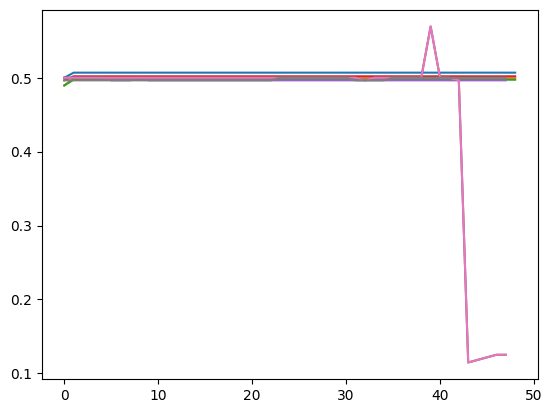

In [32]:
make_predictions(100)

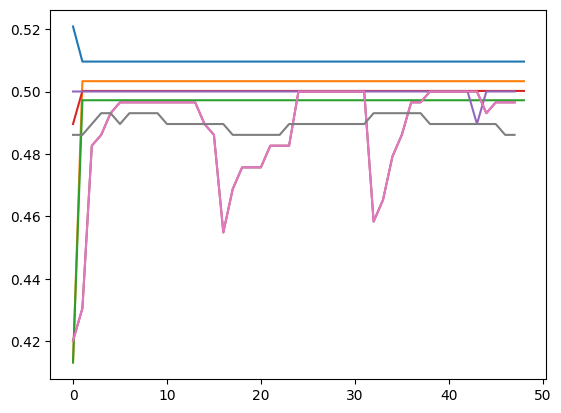

In [33]:
make_predictions(120)

In [34]:
def make_predictions(index):
    input_array = weather[index:(index+1)]
    output_array = water_inputs[index:(index+1)]
    label_array = water_labels[index:(index+1)]
    
    prediction = transformer((input_array, output_array), training=False)

    plt.plot(prediction[0])
    plt.plot(label_array[0])

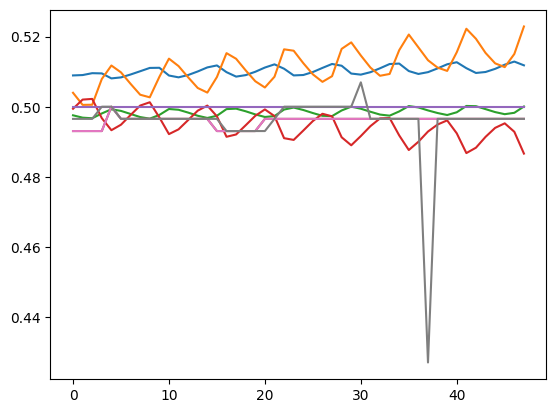

In [40]:
make_predictions(60)